# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
print("Number of mice:")
num_mice

Number of mice:


249

In [16]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data.duplicated(subset=["Mouse ID", "Timepoint"])
#Count the duplicate rows
num_duplicates =duplicates.sum()
print("Total Duplicated rows:")
num_duplicates

Total Duplicated rows:


5

In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = combined_data.loc[combined_data.duplicated(subset=["Mouse ID"]), "Mouse ID"].unique()

#filer the combined_data dataframe including only duplicates
duplicate_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)]

#display data
print("Duplicate Mouse Data:")
duplicate_data

Duplicate Mouse Data:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep ="first")
#Display the Data Frame
clean_data                                     

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# Checking the number of mice in the clean DataFrame.
num_mice =clean_data["Mouse ID"].nunique()
num_mice

249

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats= clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

#rename the columns
summary_stats.rename(columns={"mean": "Mean", "median": "Median", "var": "Variance", "std": "Standard Deviation", "sem": "SEM"}, inplace= True)
                             
#Display
summary_stats                            

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats.columns = ["Mean", "Median", "Variance", "Standard Deviation", "SEM"]
summary_stats                                            

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

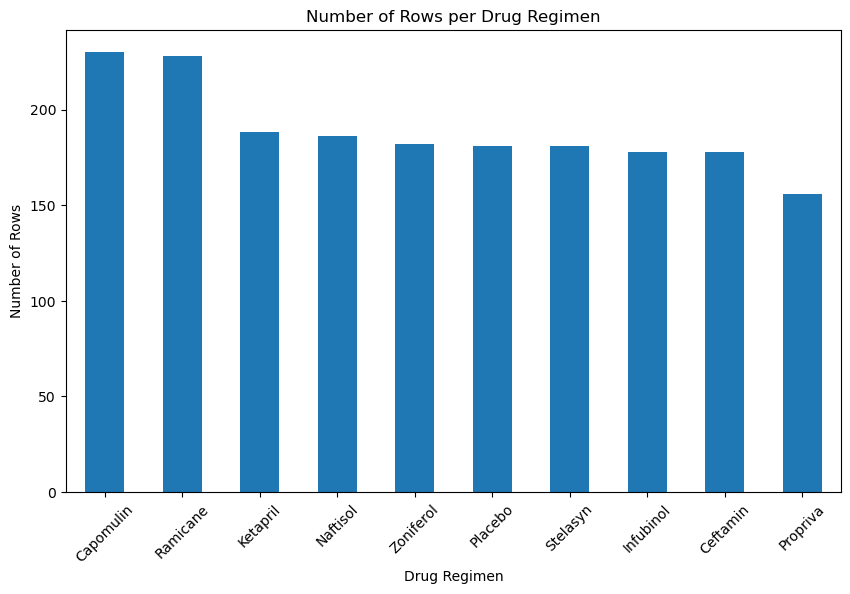

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# count the # of rows for the drug
drug_counts = clean_data["Drug Regimen"].value_counts()

# creat bar plot
drug_counts.plot(kind='bar', figsize=(10,6))
plt.title("Number of Rows per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.xticks(rotation=45)

#display
plt.show()

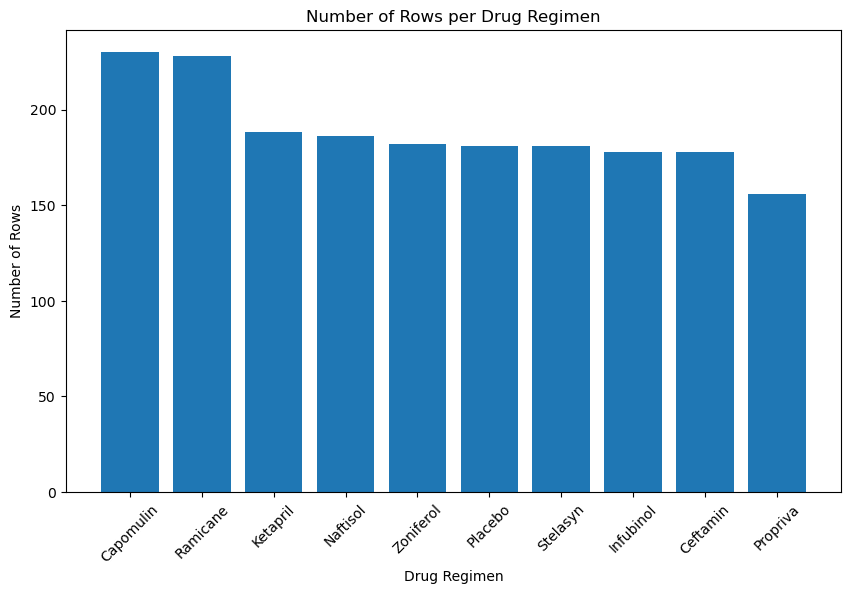

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_data["Drug Regimen"].value_counts()
#Create the bar plot
plt.figure(figsize=(10,6))
plt.bar(drug_counts.index, drug_counts.values)
plt.title("Number of Rows per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.xticks(rotation=45)

#Display graph
plt.show()

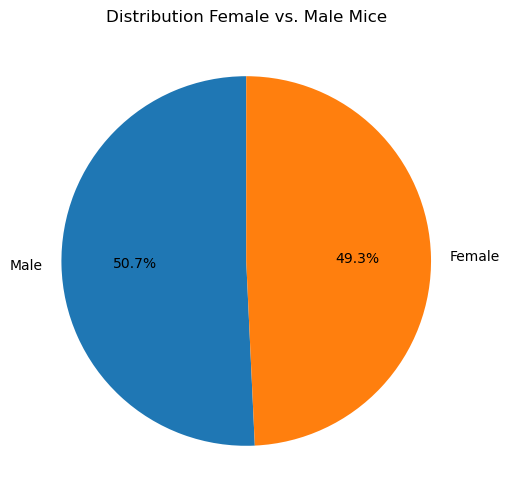

In [24]:
#count the number of female and male mice
gender_counts = clean_data["Sex"].value_counts()
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, figsize=(6, 6))
plt.title("Distribution Female vs. Male Mice")
plt.ylabel("")

#Display
plt.show()

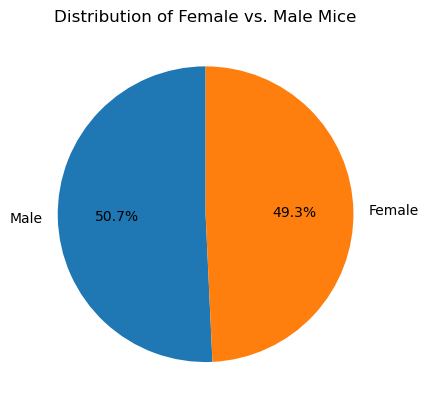

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Define labels
labels = gender_counts.index.tolist()

#Define sizes
sizes = gender_counts.values.tolist()

#create the pie plot
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Female vs. Male Mice")
plt.ylabel("")
           
#Display
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()
final_timepoints =pd.DataFrame(last_timepoint)
max_tumor = clean_data.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#merged_data= pd.merge(final_timepoints, clean_data, on=["Mouse ID", "Timepoint"], how="left")
merged_data = max_tumor.merge(clean_data,on=['Mouse ID','Timepoint'], how="left")
filtered_data = merged_data[merged_data["Drug Regimen"].isin(selected_regimens)]
#Display
filtered_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
selected_regimenst = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in selected_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == regimen, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{regimen}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


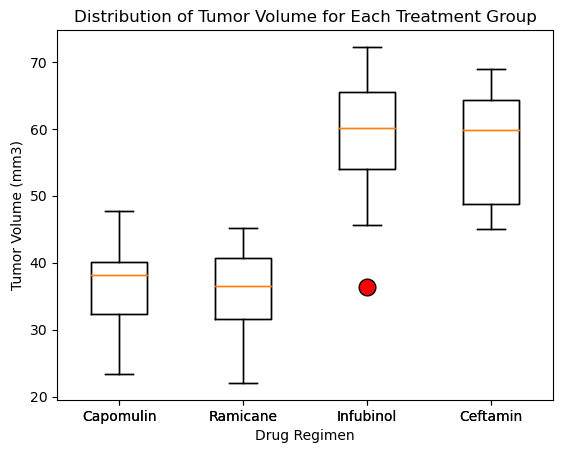

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=selected_regimens)

#add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume for Each Treatment Group")
orange_out = dict(markerfacecolor = 'red', markersize = 12)
plt.boxplot(tumor_volume_data, labels = selected_regimens, flierprops = orange_out)
#display plot
plt.show()


## Line and Scatter Plots

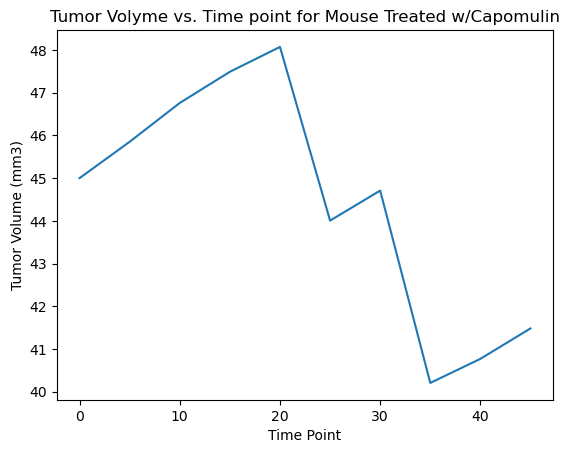

In [32]:
#prepare data
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]

#select mouse
selected_mouse = capomulin_data.loc[capomulin_data["Mouse ID"] == 'l509']

#create graph
plt.plot(selected_mouse["Timepoint"],selected_mouse["Tumor Volume (mm3)"])

#add labels and title
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volyme vs. Time point for Mouse Treated w/Capomulin")  

#print graph
plt.show()

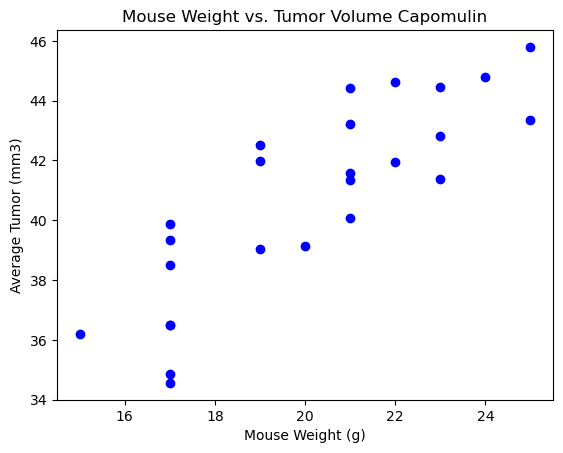

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# group data from regimen and mouse
capomulin_grouped = capomulin_data.groupby('Mouse ID', as_index=False).mean(numeric_only=True)

#take mouse weight and average tumor data
mouse_weight = capomulin_grouped['Weight (g)']
average_tumor_volume = capomulin_grouped['Tumor Volume (mm3)']

# create the scatter plot
plt.scatter(mouse_weight, average_tumor_volume, marker= 'o', color='blue')

#add the labels/titles
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor (mm3)')
plt.title('Mouse Weight vs. Tumor Volume Capomulin')

#display
plt.show()

## Correlation and Regression

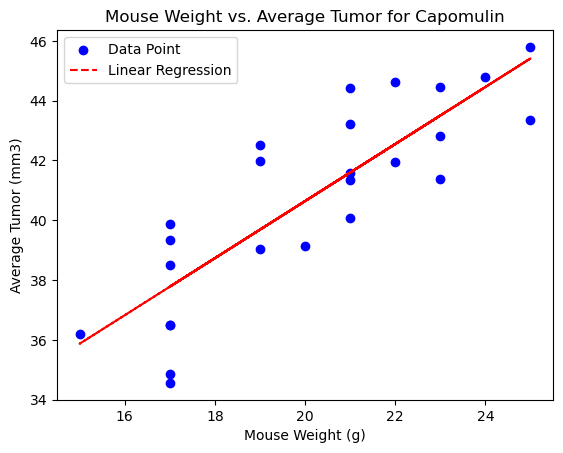

Correlation Coefficient:0.841936342469472
Linear Regression:
Slope:0.9544396890241049
Intercept: 21.552160532685008
R-value: 0.8419363424694721
P-value: 1.3225722434712404e-07
Standard Error: 0.12754359033201323


In [44]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import scipy.stats as stats

#calculate the correlation coefficient
correlation_coefficient = stats.pearsonr(mouse_weight, average_tumor_volume)[0]

#perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(mouse_weight, average_tumor_volume)

#create the scatter plot
plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='blue', label='Data Point')

#add line regression
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red', linestyle='--', label='Linear Regression')

#add labels
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor (mm3)')
plt.title('Mouse Weight vs. Average Tumor for Capomulin')

#add legend
plt.legend()

#display
plt.show()

#print correlation coefficient and regression results
print(f"Correlation Coefficient:{correlation_coefficient}")
print(f"Linear Regression:")
print(f"Slope:{slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")